In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn import tree
from sklearn.metrics import classification_report
import pickle
from sklearn.naive_bayes import MultinomialNB
import pydot
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df = df[df["Text"].notnull()]

In [ ]:
df

,Unnamed: 0,Text,Annotation,Show
0,0,Thanks man. I don't really want to talk to yo...,neutral,That 70s Show
1,1,and then the drive took forever.,neutral,That 70s Show
2,2,You know he shouldn't be.,neutral,That 70s Show
3,3,Well I apologize for ruining our first date.,neutral,That 70s Show
4,4,Yes but this is America wuss.,neutral,That 70s Show
...,...,...,...,...
33568,2005,MR. Nes toR: OK bullethead - you try.,neutral,Wonder Years
33569,2006,Math Class,neutral,Wonder Years
33570,2007,But standing there...I knew I couldn't fix wha...,neutral,Wonder Years
33571,2008,Still I made it a point to keep my distance.,neutral,Wonder Years


In [ ]:
X = df[['Text', 'Show']]
y = df['Annotation']
X

,Text,Show
0,Thanks man. I don't really want to talk to yo...,That 70s Show
1,and then the drive took forever.,That 70s Show
2,You know he shouldn't be.,That 70s Show
3,Well I apologize for ruining our first date.,That 70s Show
4,Yes but this is America wuss.,That 70s Show
...,...,...
33568,MR. Nes toR: OK bullethead - you try.,Wonder Years
33569,Math Class,Wonder Years
33570,But standing there...I knew I couldn't fix wha...,Wonder Years
33571,Still I made it a point to keep my distance.,Wonder Years


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train = X_train['Text']
X_temp = X_test
X_test = X_test['Text']

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [ ]:
train_vectors = train_vectors.toarray()

In [ ]:
test_vectors = test_vectors.toarray()

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(train_vectors, y_train)
predictions_test = clf.predict(test_vectors)

In [ ]:
report = classification_report(y_test, predictions_test, output_dict=True)
print('neutral: ', report['neutral'])
print('sexist: ', report['sexist'])

neutral:  {'precision': 0.9917432621903723, 'recall': 0.995776630689817, 'f1-score': 0.9937558538869811, 'support': 6393}
sexist:  {'precision': 0.9084745762711864, 'recall': 0.8348909657320872, 'f1-score': 0.8701298701298701, 'support': 321}


In [ ]:
pickle.dump(clf, open('decision_tree.sav', 'wb'))

In [ ]:
# j=0
# for i in X_test:
#   print(predictions_test[j], i)
#   j+=1

In [ ]:
X_test = np.array(X_test)
X_test

array(['- I support you.- Good.',
       "But it's a whole other thing to go awaywith him for the weekend to his sex cabin.",
       "That's as clear", ...,
       "That's how you get peoplearound here to listen to you  Bob.",
       'I could rifle through the manual', 'JACK : Eh!'], dtype=object)

In [ ]:
df2 = pd.DataFrame(X_test, columns=['Text'])
df3 = pd.DataFrame(X_temp)

In [ ]:
s = np.array(df3['Show'])
s

array(['Parks and Recreation', 'Family Guy', 'The Office', ..., 'Scrubs',
       'That 70s Show', 'Wonder Years'], dtype=object)

In [ ]:
for i in df2.index:
  df2.loc[i, 'Result']=predictions_test[i]
  df2.loc[i, 'Show']=s[i]


In [ ]:
df2 = df2.sort_values('Show')
df2

,Text,Result,Show
4036,We have to get this off.,neutral,Brooklyn 99
3066,but we also maybe kind of already knew.,neutral,Brooklyn 99
4285,I told you I was in theoffice because I work ...,neutral,Brooklyn 99
3081,Hey Peralta. How's it going man?,neutral,Brooklyn 99
2599,- Well this isthe Department of Records,neutral,Brooklyn 99
...,...,...,...
2280,And there you have it - logic...,neutral,Wonder Years
1180,Int. Evening - Kitchen Table,neutral,Wonder Years
4607,MADELINE: It's lovely.,neutral,Wonder Years
573,JEWELER: Solid sterling hollow or chrome plat...,neutral,Wonder Years


In [ ]:
df2.to_csv('results.csv')

In [ ]:
loaded_model = pickle.load(open('/content/decision_tree.sav', 'rb'))
result = loaded_model.score(test_vectors, y_test)
print(result)

0.988084599344653


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,predictions_test)
cm

array([[6366,   27],
       [  53,  268]])

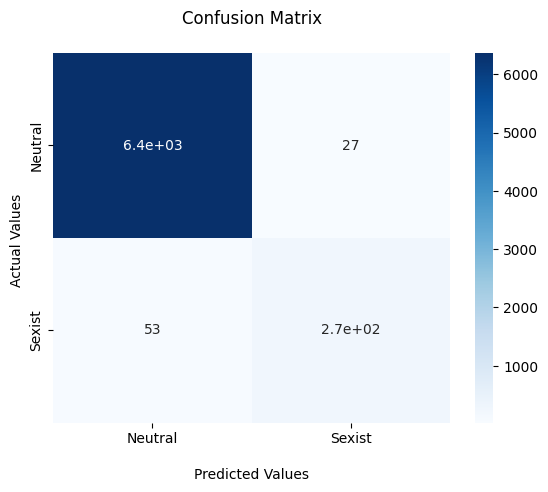

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Neutral','Sexist'])
ax.yaxis.set_ticklabels(['Neutral','Sexist'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

     neutral       0.99      1.00      0.99      6393
      sexist       0.91      0.83      0.87       321

    accuracy                           0.99      6714
   macro avg       0.95      0.92      0.93      6714
weighted avg       0.99      0.99      0.99      6714

